In [77]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [78]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [79]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

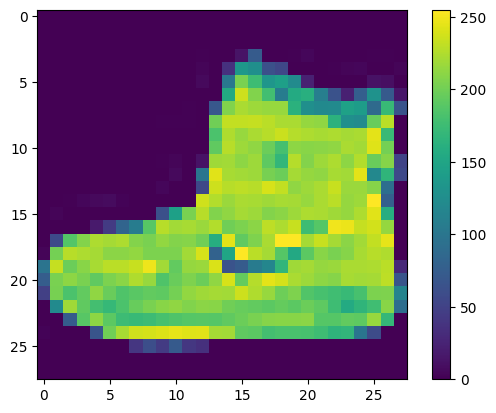

In [80]:
plt.imshow(X_train[0])
plt.colorbar()

In [81]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [82]:
class_names[y_train[0]]

'Ankle boot'

In [83]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

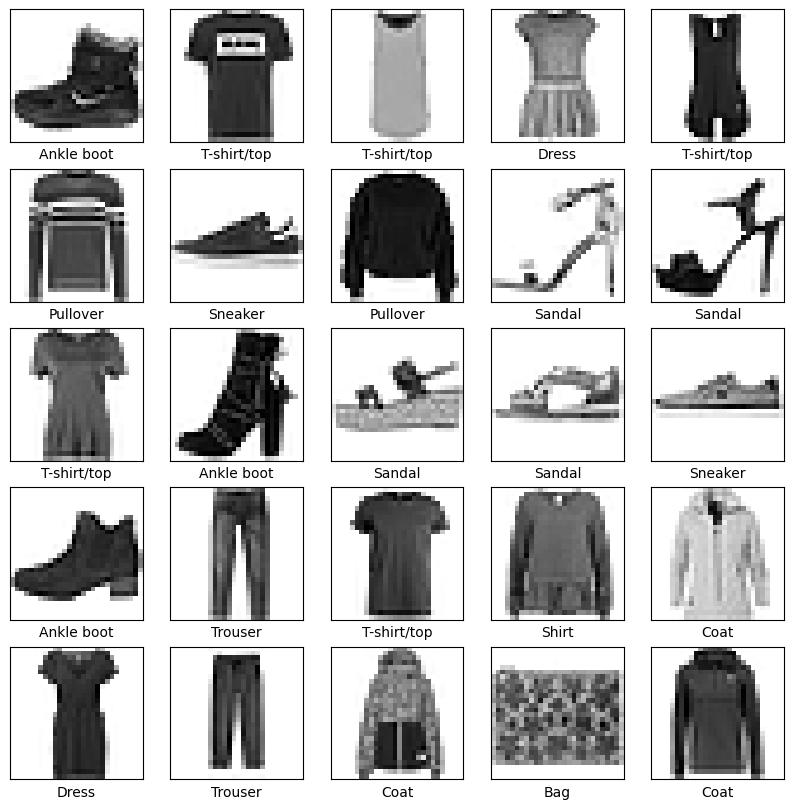

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()   

In [85]:
class_names[y_train[25]]

'Dress'

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5046 - accuracy: 0.8232
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8644
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.8767
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3160 - accuracy: 0.8846
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8909
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2822 - accuracy: 0.8953
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2715 - accuracy: 0.8993
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9041
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2517 - accuracy: 0.9059
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.243

In [87]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8849


[0.35750308632850647, 0.8848999738693237]

In [88]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [89]:
predictions = probability_model.predict(X_test_scaled)

313/313 [==============================] - 0s 1ms/step


In [90]:
predictions[0]

array([1.1122712e-06, 7.2093981e-15, 1.8372417e-10, 1.6050071e-13,
       1.3288701e-10, 3.7506336e-06, 8.4732954e-10, 4.3962407e-04,
       1.0043276e-11, 9.9955553e-01], dtype=float32)

In [91]:
np.argmax(predictions[0])

9

In [92]:
y_test[0]

9

In [98]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


9

In [95]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

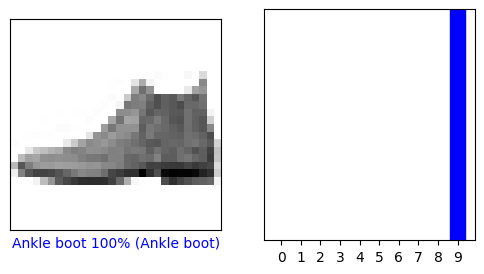

In [96]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test_scaled)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

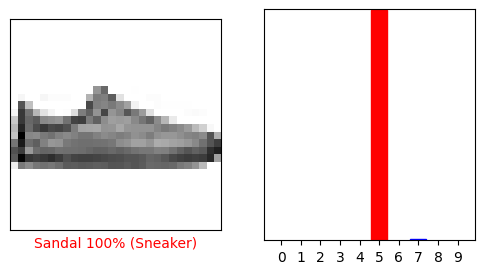

In [97]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test_scaled)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

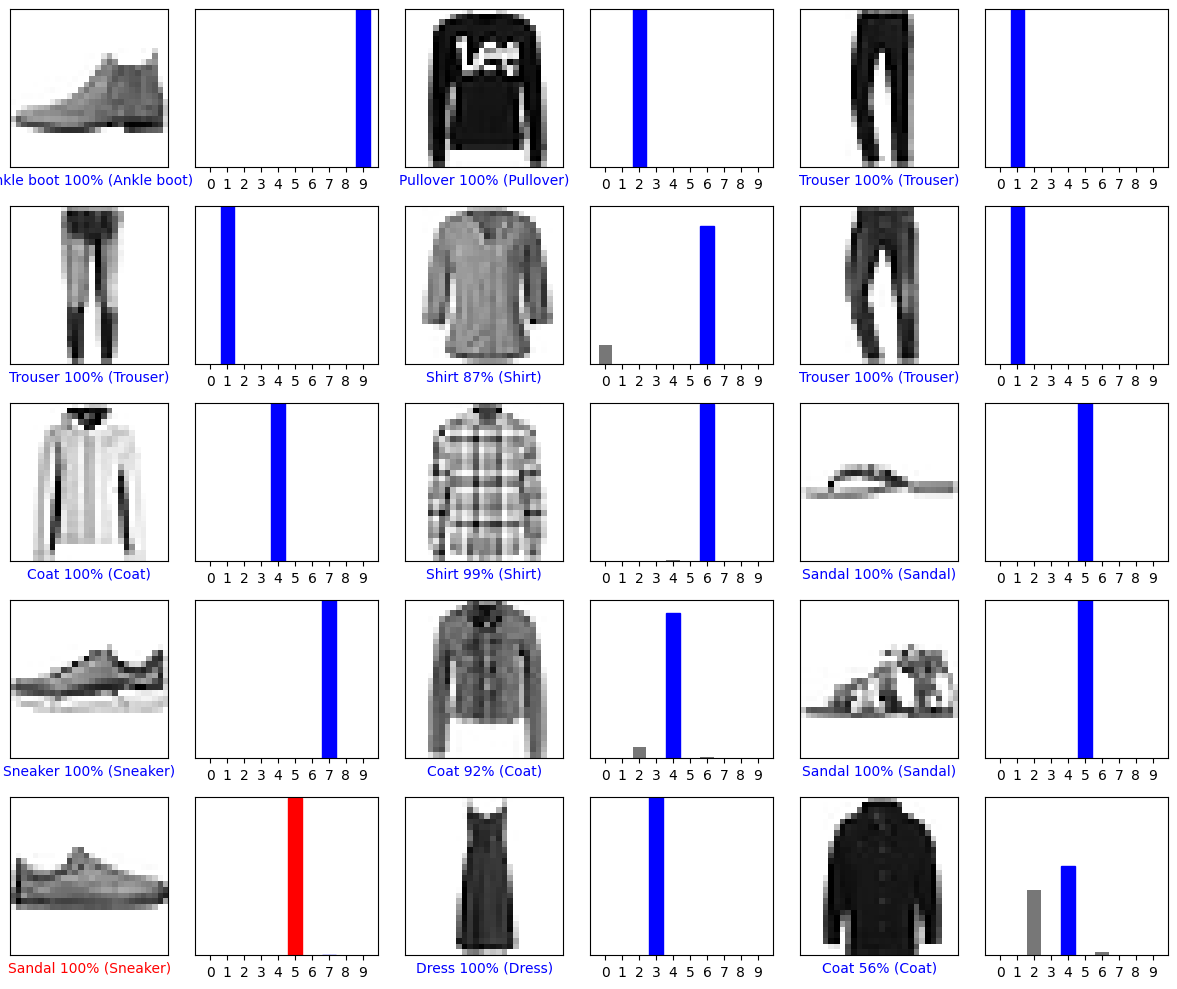

In [99]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test_scaled)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()